# **Import Library**

In [ ]:
import numpy as np, pandas as pd, seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error 

# **Examining the Dataset**

### **Reading Files and Parsing Them**

In [ ]:
dataset = pd.read_excel('dataset.xlsx')

dataset

,Komoditas (Rp),Beras,Beras Kualitas Bawah I,Beras Kualitas Bawah II,Beras Kualitas Medium I,Beras Kualitas Medium II,Beras Kualitas Super I,Beras Kualitas Super II
0,01/ 01/ 2018,14650,14350,13000,14350,13600,17550,15100
1,01/ 01/ 2019,17950,-,-,15650,14600,20400,21100
2,01/ 01/ 2020,14950,-,12450,14450,12750,18400,16700
3,01/ 01/ 2021,15800,-,13800,15700,13400,19150,16900
4,01/ 02/ 2018,17750,19350,14350,18400,15300,22050,17050
...,...,...,...,...,...,...,...,...
1539,31/ 10/ 2023,16050,14200,14400,16000,13950,19800,18050
1540,31/ 12/ 2018,18100,-,-,15650,14600,21100,21100
1541,31/ 12/ 2019,14950,-,12450,14450,12750,18400,16700
1542,31/ 12/ 2020,15800,-,13800,15700,13400,19150,16900


### **Deleting Unused Columns**
*here only two columns are used, namely "Commodity (Rp)" and "Super Quality Rice I"*

In [ ]:
hapus = ["Beras", "Beras Kualitas Bawah I", "Beras Kualitas Bawah II",
         "Beras Kualitas Medium I", "Beras Kualitas Medium II",
         "Beras Kualitas Super II"]

clean_data = dataset.drop(labels=hapus, axis=1)

clean_data

,Komoditas (Rp),Beras Kualitas Super I
0,01/ 01/ 2018,17550
1,01/ 01/ 2019,20400
2,01/ 01/ 2020,18400
3,01/ 01/ 2021,19150
4,01/ 02/ 2018,22050
...,...,...
1539,31/ 10/ 2023,19800
1540,31/ 12/ 2018,21100
1541,31/ 12/ 2019,18400
1542,31/ 12/ 2020,19150


# **Exploratory Data Analisis (EDA)**

In [ ]:
clean_data.shape

(1544, 2)

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544 entries, 0 to 1543
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Komoditas (Rp)          1544 non-null   object
 1   Beras Kualitas Super I  1544 non-null   object
dtypes: object(2)
memory usage: 24.2+ KB


### **Changing Data Type**
*data type changed to match*
* *commodity column changed to datetime type*
* *rice column changed to numeric type*

In [ ]:
clean_data["Komoditas (Rp)"] = pd.to_datetime(clean_data["Komoditas (Rp)"].str.replace(' ',''), format="%d/%m/%Y")
clean_data["Beras Kualitas Super I"] = pd.to_numeric(clean_data["Beras Kualitas Super I"], errors='coerce').astype(float).astype('Int64')

clean_data

,Komoditas (Rp),Beras Kualitas Super I
0,2018-01-01,17550
1,2019-01-01,20400
2,2020-01-01,18400
3,2021-01-01,19150
4,2018-02-01,22050
...,...,...
1539,2023-10-31,19800
1540,2018-12-31,21100
1541,2019-12-31,18400
1542,2020-12-31,19150


In [ ]:
clean_data.rename(columns={"Komoditas (Rp)": "Tanggal",
                           "Beras Kualitas Super I": "Harga Super I"}, inplace=True)

clean_data

,Tanggal,Harga Super I
0,2018-01-01,17550
1,2019-01-01,20400
2,2020-01-01,18400
3,2021-01-01,19150
4,2018-02-01,22050
...,...,...
1539,2023-10-31,19800
1540,2018-12-31,21100
1541,2019-12-31,18400
1542,2020-12-31,19150


In [ ]:
clean_data.isnull().sum()

Tanggal           0
Harga Super I    37
dtype: int64

*there is empty data but the amount is small, so just delete the record*

In [ ]:
clean_data = clean_data.dropna()

clean_data

,Tanggal,Harga Super I
0,2018-01-01,17550
1,2019-01-01,20400
2,2020-01-01,18400
3,2021-01-01,19150
4,2018-02-01,22050
...,...,...
1539,2023-10-31,19800
1540,2018-12-31,21100
1541,2019-12-31,18400
1542,2020-12-31,19150


In [ ]:
# Sorting DataFrame by 'date' column
clean_data = clean_data.sort_values(by='Tanggal')

clean_data

,Tanggal,Harga Super I
0,2018-01-01,17550
51,2018-01-02,17550
102,2018-01-03,17550
153,2018-01-04,17550
203,2018-01-05,17550
...,...,...
1162,2023-11-23,19800
1213,2023-11-24,19800
1364,2023-11-27,19800
1415,2023-11-28,19800


In [ ]:
new_data = clean_data.set_index('Tanggal')  
new_data.sort_index(inplace=True)  

new_data

,Harga Super I
Tanggal,
2018-01-01,17550
2018-01-02,17550
2018-01-03,17550
2018-01-04,17550
2018-01-05,17550
...,...
2023-11-23,19800
2023-11-24,19800
2023-11-27,19800


### **Data Characteristics with Basic Statistical Description**

In [ ]:
new_data.describe().style.background_gradient(cmap='Greens')

,Harga Super I
count,1507.000000
mean,19975.348374
std,1211.600549
min,16700.000000
25%,18800.000000
50%,20600.000000
75%,20700.000000
max,22050.000000


### **Unique Data**

In [ ]:
for column in new_data.columns:
    unique_values = new_data[column].nunique()
    print(f"Jumlah nilai unik yang ada di kolom {column} adalah {unique_values}")

Jumlah nilai unik yang ada di kolom Harga Super I adalah 29


In [ ]:
for column in new_data.columns:
  value_counts = new_data[column].value_counts()
  print(f'Value counts yang ada di kolom {column}:')
  print(value_counts)

Value counts yang ada di kolom Harga Super I:
20700    346
20600    238
22050    140
18600    106
18400     94
18800     78
19150     78
18700     73
18900     51
21100     44
19800     37
19550     31
20750     29
17700     28
18500     27
18350     20
21050     15
19700     10
21850      9
16700      8
19100      8
17550      7
20400      5
18750      5
21500      5
21700      5
20250      5
19050      4
21800      1
Name: Harga Super I, dtype: Int64


### **Outliers Data**

In [ ]:
def count_outliers(data):
    columns = new_data.columns
    outlier_counts = {}

    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

        print(f"Kolom: {column}")
        print(f"  Lower Bound: {lower_bound}")
        print(f"  Upper Bound: {upper_bound}", "\n")

    return outlier_counts

outlier_counts = count_outliers(new_data)
print(f'Jumlah Data Outliers adalah:', outlier_counts)

Kolom: Harga Super I
  Lower Bound: 15950.0
  Upper Bound: 23550.0 

Jumlah Data Outliers adalah: {'Harga Super I': 0}


# **Data Visualization**

### **Time Visualization**

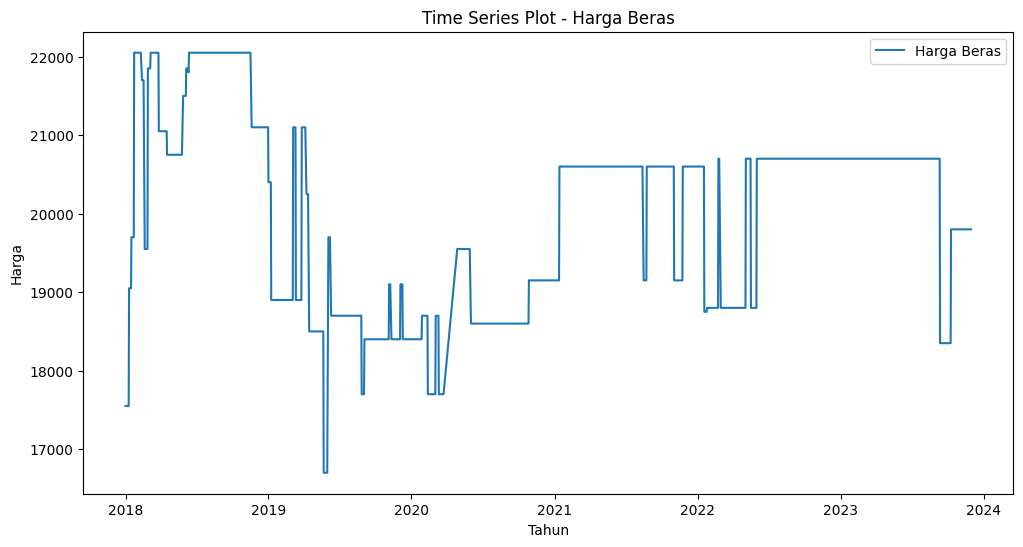

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(clean_data['Tanggal'], new_data['Harga Super I'], label='Harga Beras')
plt.title('Time Series Plot - Harga Beras')

plt.xlabel('Tahun')
plt.ylabel('Harga')

plt.legend()
plt.show()

### **Box Plot**
*outliers can provide valuable information about extreme variations in price data that can be useful in understanding trends or specific events*

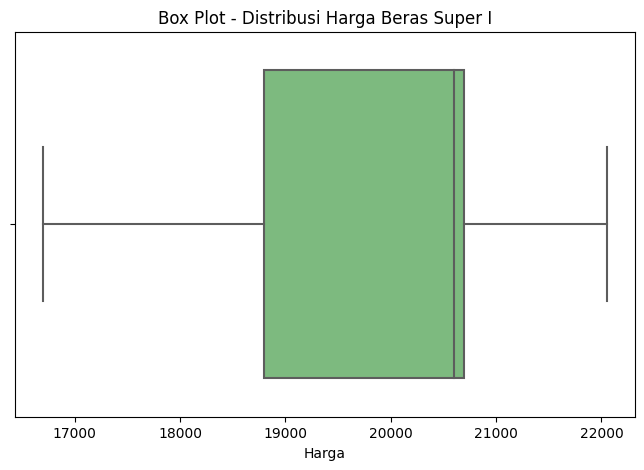

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(x=new_data['Harga Super I'], palette='Greens')

plt.title('Box Plot - Distribusi Harga Beras Super I')
plt.xlabel('Harga')

plt.show()

### **Daily Data Plot**

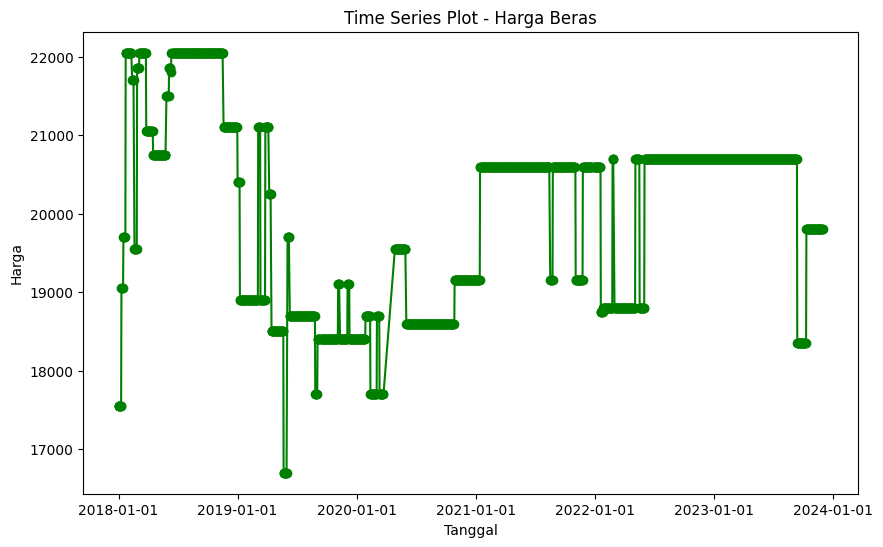

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(clean_data['Tanggal'], new_data['Harga Super I'], marker='o', linestyle='-', color='g')

plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Time Series Plot - Harga Beras')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.show()

### **Yearly Data Plot**
*this plot is based on an annual average*

<ipython-input-19-6a1cb2c1a74a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_yearly = clean_data.groupby(clean_data['Tanggal'].dt.year).mean()


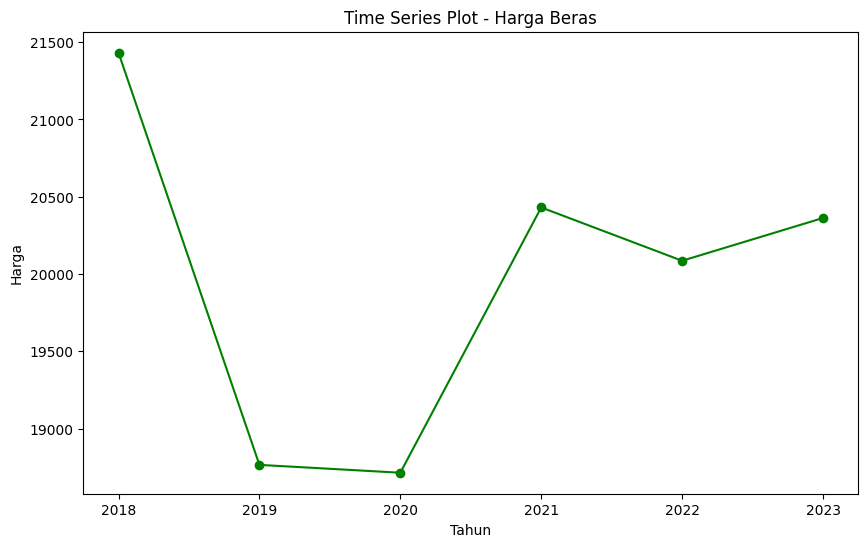

In [ ]:
df_yearly = clean_data.groupby(clean_data['Tanggal'].dt.year).mean()

plt.figure(figsize=(10, 6))
plt.plot(df_yearly.index, df_yearly['Harga Super I'], marker='o', linestyle='-', color='g')

plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.title('Time Series Plot - Harga Beras')

plt.show()

# **Constructing Dataset**
*create new column for features useful for prediction*

In [ ]:
years = new_data.index.year
months = new_data.index.month
days = new_data.index.day

new_data['Tanggal'] = years*10000 + months*100 + days 
new_data['Tahun'] = new_data.index.year  
new_data['Bulan'] = new_data.index.month  
new_data['Hari'] = new_data.index.day  
new_data['Hari_Tahun'] = new_data.index.dayofyear  
new_data['Hari_Minggu'] = new_data.index.dayofweek  
new_data['Minggu_Tahun'] = new_data.index.weekofyear  

<ipython-input-20-6fc159df5a60>:12: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  new_data['Minggu_Tahun'] = new_data.index.weekofyear  # Tambah kolom 'Minggu_Tahun' dengan minggu dalam tahun dari indeks tanggal


In [ ]:
new_data

,Harga Super I,Tanggal,Tahun,Bulan,Hari,Hari_Tahun,Hari_Minggu,Minggu_Tahun
Tanggal,,,,,,,,
2018-01-01,17550,20180101,2018,1,1,1,0,1
2018-01-02,17550,20180102,2018,1,2,2,1,1
2018-01-03,17550,20180103,2018,1,3,3,2,1
2018-01-04,17550,20180104,2018,1,4,4,3,1
2018-01-05,17550,20180105,2018,1,5,5,4,1
...,...,...,...,...,...,...,...,...
2023-11-23,19800,20231123,2023,11,23,327,3,47
2023-11-24,19800,20231124,2023,11,24,328,4,47
2023-11-27,19800,20231127,2023,11,27,331,0,48


# **Split Data**

In [ ]:
X = new_data[['Tanggal', 'Tahun', 'Bulan', 'Hari', 'Hari_Tahun', 'Hari_Minggu', 'Minggu_Tahun']]
y = new_data[['Harga Super I']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Random Forest**
*The Random Forest model is suitable for price prediction due to its feature diversity, its ability to reduce overfitting through the use of many decision trees, its good handling of close relationships between features, its ability to rank feature importance, and its ease of implementation without the need for complex parameter tuning. However, as with all models, the performance of Random Forest still depends on the specific characteristics of the data used and may require adjustments to provide optimal prediction results.*

### **Train Model**

In [ ]:
model = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

##### **Prediction**

In [ ]:
y_pred = model.predict(X_test)

##### **Price Prediction**

In [ ]:
combined_feature = X_test['Tanggal']

year = combined_feature // 10000
month = (combined_feature // 100) % 100
day = combined_feature % 100

date_time = pd.to_datetime({'year':year, 'month':month, 'day':day})

###### **Daily Plot**

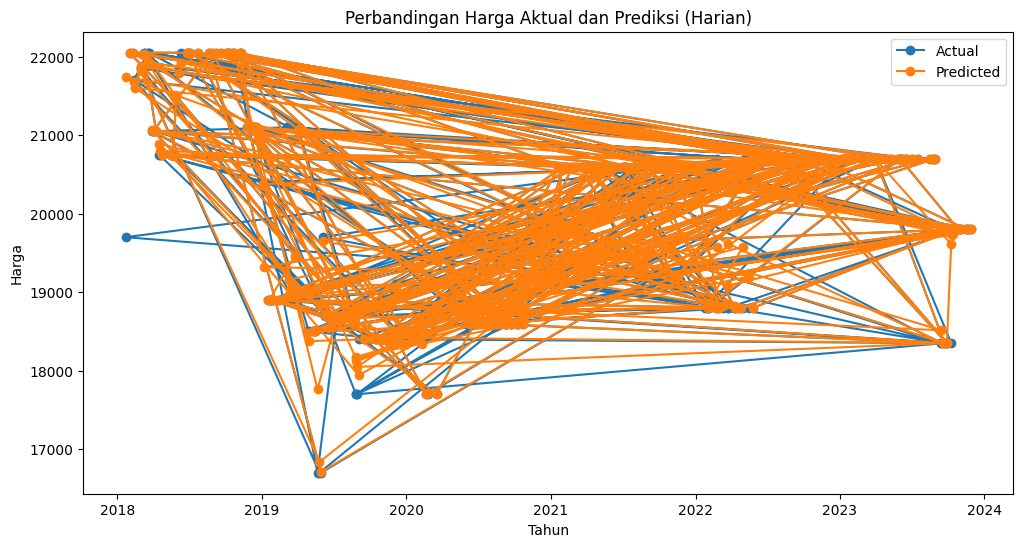

In [ ]:
plot_data = pd.DataFrame({'Tanggal':date_time.values, 'Actual':y_test.values.flatten(), 'Predicted':y_pred.flatten()})
plot_data.set_index('Tanggal', inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(plot_data.index, plot_data['Actual'], label='Actual', marker='o')
plt.plot(plot_data.index, plot_data['Predicted'], label='Predicted', marker='o')

plt.title('Perbandingan Harga Aktual dan Prediksi (Harian)')

plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()

plt.show()

###### **Weekly Plot**

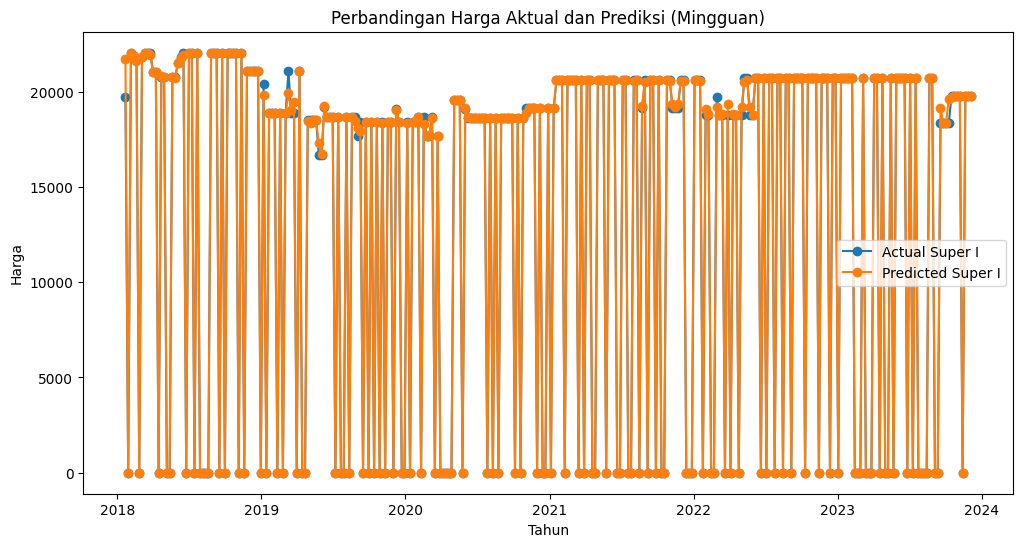

In [ ]:
plot_data = pd.DataFrame({
    'Tanggal': date_time.values,
    'Actual Super I': y_test['Harga Super I'].values,
    'Predicted Super I': y_pred[:]
})
plot_data.set_index('Tanggal', inplace=True)
plot_data_weekly = plot_data.resample('W-Mon').mean()
plot_data_weekly_filled = plot_data_weekly.fillna(0) # Fill missing values with zeros

plt.figure(figsize=(12, 6))

plt.plot(plot_data_weekly_filled.index, plot_data_weekly_filled['Actual Super I'], label='Actual Super I', marker='o')
plt.plot(plot_data_weekly_filled.index, plot_data_weekly_filled['Predicted Super I'], label='Predicted Super I', marker='o')

plt.title('Perbandingan Harga Aktual dan Prediksi (Mingguan)')

plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()

plt.show()

##### **Evaluation**

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

R-squared (R2): 0.9552956140920605
Mean Squared Error (MSE): 65355.34768211921
Root Mean Squared Error (RMSE): 255.6469199542979


### **Model Hyperparameter Tuning**

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 200, 400], 
    'max_depth': [None, 2, 4, 8, 16, 32], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_  # using the best model found by GridSearchCV
y_pred_best = best_rf_model.predict(X_test)

print("Hyperparameter terbaik:", grid_search.best_params_)

Output streaming akan dipotong hingga 5000 baris terakhir.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3

Hyperparameter terbaik: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


##### **Evaluation**

In [ ]:
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

print("R-squared (R2) terbaik:", r2_best)
print("Mean Squared Error (MSE) terbaik:", mse_best)
print("Root Mean Squared Error (RMSE) terbaik:", rmse_best)

R-squared (R2) terbaik: 0.9525862345147816
Mean Squared Error (MSE) terbaik: 69316.31125827815
Root Mean Squared Error (RMSE) terbaik: 263.27991047225413


# **One Year Ahead Prediction**

### **Initialize and Train a Random Forest Regression Model**
*The results of the evaluation matrix show that the RF model with default parameters is better than the RF model with hyperparameters, so for predictions the RF model with default parameters will be used*

In [ ]:
model_up = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

model_up.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

### **New Data for the next 366 days**
*starting from after the last date in the dataset, which is 11-30-2023*

In [ ]:
last_date = new_data.index.max()

future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=366, freq='D')

years = future_dates.year
months = future_dates.month
days = future_dates.day

future_features = pd.DataFrame({
    'Tanggal': years*10000 + months*100 + days, 
    'Tahun' : future_dates.year,  
    'Bulan' : future_dates.month,  
    'Hari' : future_dates.day,  
    'Hari_Tahun' : future_dates.dayofyear,  
    'Hari_Minggu' : future_dates.dayofweek,  
    'Minggu_Tahun' : future_dates.weekofyear  

    }, index=future_dates)

y_future_pred = model_up.predict(future_features)

<ipython-input-34-0d18b6d43c17>:17: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  'Minggu_Tahun' : future_dates.weekofyear  # Tambah kolom 'Minggu_Tahun' dengan minggu dalam tahun dari indeks tanggal


In [ ]:
combined_feature = X['Tanggal']

year = combined_feature // 10000
month = (combined_feature // 100) % 100
day = combined_feature % 100

date_time = pd.to_datetime({'year':year, 'month':month, 'day':day})

In [ ]:
future_predictions_df = pd.DataFrame({
    'Tanggal': future_dates,
    'Prediksi Harga': y_future_pred
})

future_predictions_df

,Tanggal,Prediksi Harga
0,2023-12-01,19800.0
1,2023-12-02,19800.0
2,2023-12-03,19800.0
3,2023-12-04,19800.0
4,2023-12-05,19800.0
...,...,...
361,2024-11-26,19800.0
362,2024-11-27,19800.0
363,2024-11-28,19800.0
364,2024-11-29,19800.0


In [ ]:
future_predictions_df['Prediksi Harga'].nunique()

7

In [ ]:
future_predictions_df['Prediksi Harga'].value_counts()

18857.5    279
19800.0     79
19785.5      4
18901.0      1
19133.0      1
19321.5      1
19640.5      1
Name: Prediksi Harga, dtype: int64

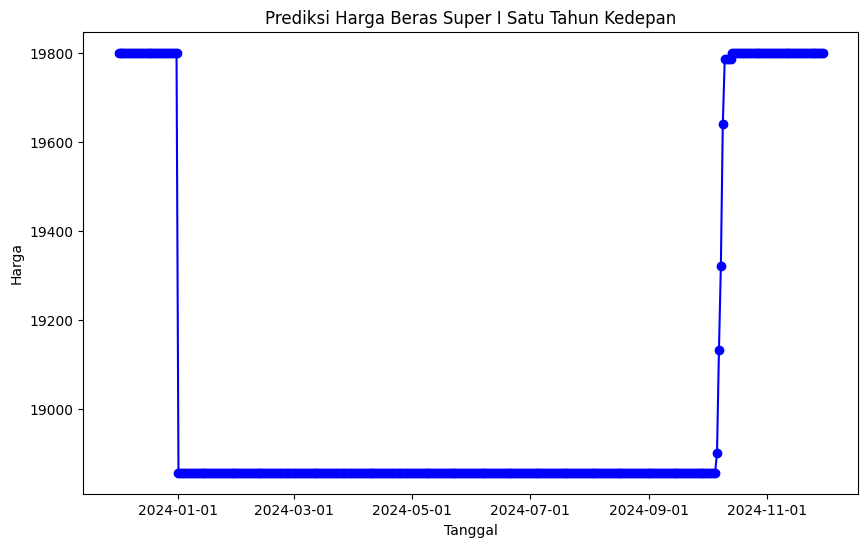

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(future_predictions_df['Tanggal'], future_predictions_df['Prediksi Harga'], marker='o', linestyle='-', color='b')

plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Prediksi Harga Beras Super I Satu Tahun Kedepan')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.show()

### **Combining Original Data with Predicted Data**

In [ ]:
y_test_pred = model_up.predict(X)

In [ ]:
future_predictions_df_merge = pd.DataFrame({
    "Tanggal": np.concatenate([date_time.values, future_dates]),
    "Prediksi Harga Super I": np.concatenate([y_test_pred, y_future_pred])
})

future_predictions_df_merge

,Tanggal,Prediksi Harga Super I
0,2018-01-01,17550.0
1,2018-01-02,17550.0
2,2018-01-03,17550.0
3,2018-01-04,17550.0
4,2018-01-05,17550.0
...,...,...
1868,2024-11-26,19800.0
1869,2024-11-27,19800.0
1870,2024-11-28,19800.0
1871,2024-11-29,19800.0


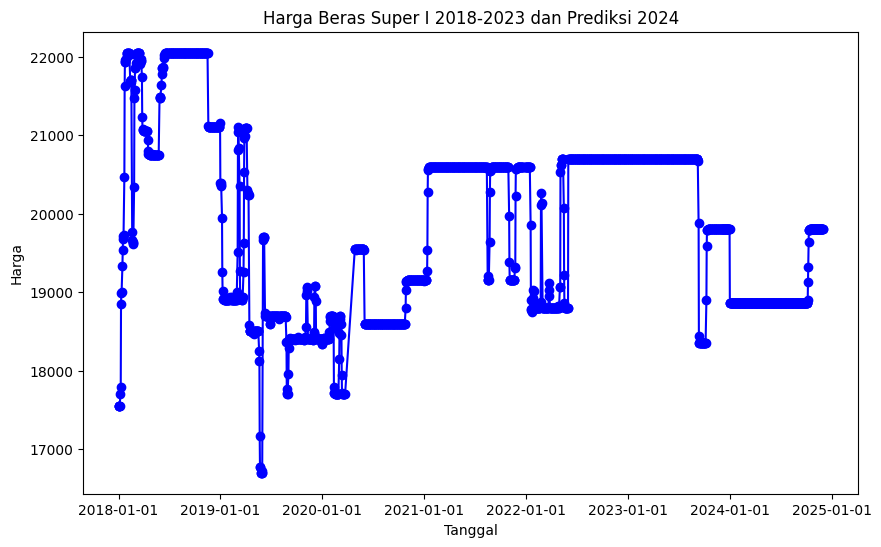

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(future_predictions_df_merge['Tanggal'], future_predictions_df_merge['Prediksi Harga Super I'], marker='o', linestyle='-', color='b')

plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Harga Beras Super I 2018-2023 dan Prediksi 2024')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.show()